# Marketing Campaign Results

source: https://platform.stratascratch.com/data-projects/marketing-campaign-results

In [2]:
import pandas as pd
import seaborn as sns

### Readin data and initial processsing

In [3]:
client = pd.read_csv("./datasets/client_data.csv")
deposit = pd.read_csv("./datasets/deposit_data.csv")
calendar = pd.read_csv("./datasets/calendar_data.csv")

In [4]:
print(client.info())
print(deposit.info())
print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46347 entries, 0 to 46346
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   client_id                   46347 non-null  int64 
 1   client_geographical_region  46347 non-null  object
 2   client_residence_status     46347 non-null  object
 3   client_age                  46347 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB

#### Combine three data sets into one master dataset

In [5]:
master = deposit.merge(client, on="client_id", how="left").merge(
    calendar, left_on="deposit_date", right_on="gregorian_date", how="left"
)

#### Data exploration

##### Numerical variables overview

In [6]:
master.describe()

,client_id,deposit_amount,client_age
count,4.803940e+05,480394.000000,480394.000000
mean,4.992809e+14,365.207130,52.192469
std,2.899833e+14,346.644434,13.773928
min,1.460463e+11,0.010000,21.000000
25%,2.477689e+14,200.000000,41.000000
50%,5.015297e+14,290.000000,52.000000
75%,7.503108e+14,452.000000,62.000000
max,9.999856e+14,30000.000000,105.000000


##### Categorical variables overview

In [7]:
catVars = master.select_dtypes("object").columns.to_list()

for v in catVars:
    print(f"{v}: {master[v].nunique()} {master[v].unique()[0:10]}")

deposit_type: 2 ['Actual Deposit' 'Scheduled Deposit']
deposit_cadence: 3 ['Monthly' 'Biweekly' 'Extra']
deposit_date: 153 ['2019-10-23' '2019-09-23' '2019-06-23' '2019-07-23' '2019-08-23'
 '2019-09-12' '2019-09-26' '2019-06-22' '2019-07-06' '2019-06-08']
client_geographical_region: 4 ['West' 'South' 'Northeast' 'Midwest']
client_residence_status: 2 ['Rent' 'Own']
gregorian_date: 153 ['2019-10-23' '2019-09-23' '2019-06-23' '2019-07-23' '2019-08-23'
 '2019-09-12' '2019-09-26' '2019-06-22' '2019-07-06' '2019-06-08']
month_name: 5 ['Month 5' 'Month 4' 'Month 1' 'Month 2' 'Month 3']


##### Check missings

In [8]:
master.isna().sum()

client_id                     0
deposit_type                  0
deposit_amount                0
deposit_cadence               0
deposit_date                  0
client_geographical_region    0
client_residence_status       0
client_age                    0
gregorian_date                0
month_name                    0
dtype: int64

##### Can a client's desposit cadence change? - yes

In [9]:
x = (
    deposit.sort_values(["client_id", "deposit_cadence"])
    .groupby("client_id", as_index=False)
    .deposit_cadence.unique()
    .assign(deposit_cadence=lambda x: x.deposit_cadence.apply(tuple))
)
x.deposit_cadence.value_counts()

deposit_cadence
(Monthly,)                    29271
(Biweekly,)                   11766
(Extra, Monthly)               3048
(Biweekly, Extra)              1142
(Extra,)                        845
(Biweekly, Monthly)             212
(Biweekly, Extra, Monthly)       63
Name: count, dtype: int64

An example of client switching cadence and also making extra payment

In [10]:
master.query("client_id == 945195860266").sort_values(["deposit_date", "deposit_type"])

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,gregorian_date,month_name
60653,945195860266,Actual Deposit,348.0,Monthly,2019-06-16,West,Rent,34,2019-06-16,Month 1
60651,945195860266,Scheduled Deposit,348.0,Monthly,2019-06-16,West,Rent,34,2019-06-16,Month 1
166676,945195860266,Actual Deposit,174.0,Monthly,2019-07-20,West,Rent,34,2019-07-20,Month 2
166675,945195860266,Scheduled Deposit,174.0,Monthly,2019-07-20,West,Rent,34,2019-07-20,Month 2
60652,945195860266,Actual Deposit,174.0,Extra,2019-07-27,West,Rent,34,2019-07-27,Month 2
207569,945195860266,Actual Deposit,174.0,Biweekly,2019-08-10,West,Rent,34,2019-08-10,Month 3
207568,945195860266,Scheduled Deposit,174.0,Biweekly,2019-08-10,West,Rent,34,2019-08-10,Month 3
60655,945195860266,Actual Deposit,174.0,Biweekly,2019-08-24,West,Rent,34,2019-08-24,Month 3
60654,945195860266,Scheduled Deposit,174.0,Biweekly,2019-08-24,West,Rent,34,2019-08-24,Month 3
60646,945195860266,Actual Deposit,174.0,Biweekly,2019-09-07,West,Rent,34,2019-09-07,Month 4


##### Can the Scheduled deposit and actual deposit be different? - yes

In [11]:
(
    master.query("deposit_type.isin(['Actual Deposit', 'Scheduled Deposit'])")
    .pivot_table(
        index=["client_id", "deposit_date"],
        columns="deposit_type",
        values="deposit_amount",
    )
    .dropna()
    .rename(
        {"Actual Deposit": "Actual_Deposit", "Scheduled Deposit": "Scheduled_Deposit"},
        axis=1,
    )
    .query("Actual_Deposit != Scheduled_Deposit")
)

deposit_type                  Actual_Deposit  Scheduled_Deposit
client_id       deposit_date                                   
625882515630    2019-10-20              97.0             133.00
1211140273733   2019-08-09             322.0             261.00
                2019-08-23             322.0             261.00
1274168007988   2019-10-06             223.0             246.00
2035251420486   2019-10-10             560.0             620.00
...                                      ...                ...
993234555530702 2019-10-22              25.0             190.50
997135926563943 2019-08-12             375.0             418.75
                2019-08-26             375.0             418.75
997567464814353 2019-06-26             100.0            1026.00
999904264600900 2019-08-02             418.0             835.00

[854 rows x 2 columns]

Not all actual deposit has a corresponding scheduled deposit. It may be because it is an extra payment, or no reason at all.
Not all scheduled deposit would result in an actual deposit. 
Therefore we shall just focus on actual deposit because that is what happened in real.

In [12]:
# Missing scheduled deposit
master.query("client_id == 714514923232")

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,gregorian_date,month_name
16753,714514923232,Scheduled Deposit,398.0,Monthly,2019-06-25,West,Own,70,2019-06-25,Month 1
16754,714514923232,Actual Deposit,398.0,Monthly,2019-06-25,West,Own,70,2019-06-25,Month 1
168816,714514923232,Scheduled Deposit,398.0,Monthly,2019-07-25,West,Own,70,2019-07-25,Month 2
168817,714514923232,Actual Deposit,398.0,Monthly,2019-07-25,West,Own,70,2019-07-25,Month 2
245570,714514923232,Actual Deposit,398.0,Monthly,2019-08-25,West,Own,70,2019-08-25,Month 3
310149,714514923232,Actual Deposit,398.0,Monthly,2019-10-25,West,Own,70,2019-10-25,Month 5
439347,714514923232,Actual Deposit,398.0,Monthly,2019-09-25,West,Own,70,2019-09-25,Month 4


In [13]:
# Missing actual deposit
master.query("client_id == 253175837503").sort_values(["month_name", "deposit_type"])

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,gregorian_date,month_name
38830,253175837503,Scheduled Deposit,246.0,Monthly,2019-06-13,Northeast,Own,69,2019-06-13,Month 1
38831,253175837503,Scheduled Deposit,246.0,Monthly,2019-07-13,Northeast,Own,69,2019-07-13,Month 2
211502,253175837503,Scheduled Deposit,246.0,Monthly,2019-08-13,Northeast,Own,69,2019-08-13,Month 3
404004,253175837503,Scheduled Deposit,246.0,Monthly,2019-09-13,Northeast,Own,69,2019-09-13,Month 4
276126,253175837503,Scheduled Deposit,246.0,Monthly,2019-10-13,Northeast,Own,69,2019-10-13,Month 5


##### Create a client level data set pre-and post-compaign change

In [14]:
master.columns

Index(['client_id', 'deposit_type', 'deposit_amount', 'deposit_cadence',
       'deposit_date', 'client_geographical_region', 'client_residence_status',
       'client_age', 'gregorian_date', 'month_name'],
      dtype='object')

In [33]:
campaign = (
    master.query('deposit_type == "Actual Deposit"')
    .groupby(
        [
            "client_id",
            "client_geographical_region",
            "client_residence_status",
            "client_age",
            "month_name",
        ]
    )
    .agg(deposit_amount=("deposit_amount", "sum"))
    .reset_index()
    .assign(
        month=lambda x: x.month_name.str[-1].astype(int),
        stage=lambda x: x.month.case_when(
            [
                (x.month.isin([1, 2]), "1. Pre-campaign"),
                (x.month.isin([4, 5]), "3. Post-campaign"),
                (x.month.isin([3]), "2. In-compaign"),
            ]
        ),
    )
)
campaign

,client_id,client_geographical_region,client_residence_status,client_age,month_name,deposit_amount,month,stage
0,146046305811,Midwest,Rent,42,Month 1,494.0,1,1. Pre-campaign
1,146046305811,Midwest,Rent,42,Month 2,741.0,2,1. Pre-campaign
2,146046305811,Midwest,Rent,42,Month 3,494.0,3,2. In-compaign
3,146046305811,Midwest,Rent,42,Month 4,494.0,4,3. Post-campaign
4,146046305811,Midwest,Rent,42,Month 5,494.0,5,3. Post-campaign
...,...,...,...,...,...,...,...,...
173581,999985563097570,West,Own,54,Month 1,300.0,1,1. Pre-campaign
173582,999985563097570,West,Own,54,Month 2,300.0,2,1. Pre-campaign
173583,999985563097570,West,Own,54,Month 3,300.0,3,2. In-compaign
173584,999985563097570,West,Own,54,Month 4,300.0,4,3. Post-campaign


<Axes: xlabel='month', ylabel='deposit_amount'>

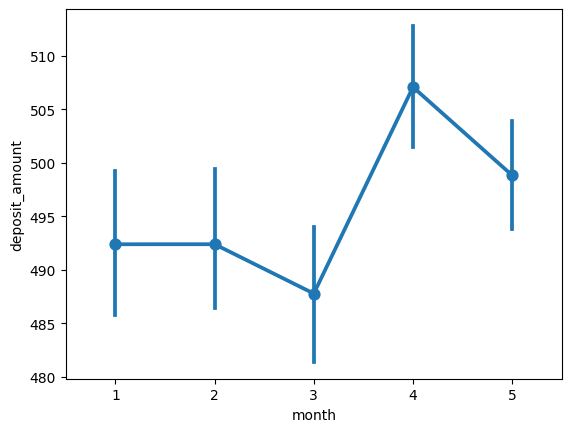

In [18]:
sns.pointplot(campaign, x="month", y="deposit_amount")

### (1) Marketing effects

In [ ]:
summarydf = (
    campaign.groupby("stage")
    .agg(n_clients=("client_id", "nunique"), deposit=("deposit_amount", "sum"))
    .assign(deposit_per_user=lambda x: x.deposit / x.n_clients)
    .transpose()
    .reset_index()
    .rename({"index": "stage"}, axis=1)
)
summarydf

stage,stage,1. Pre-campaign,2. In-compaign,3. Post-campaign
0,n_clients,3.145400e+04,4.002700e+04,3.896300e+04
1,deposit,2.894381e+07,1.952439e+07,3.760925e+07
2,deposit_per_user,9.201948e+02,4.877806e+02,9.652554e+02


In [ ]:
summarydf[summarydf.stage == "deposit"]["3.Post-campaign"]

KeyError: '3.Post-campaign'

In [75]:
total_deposit_increase = (
    summarydf[summarydf.stage == "deposit"]["3. Post-campaign"]
    - summarydf[summarydf.stage == "deposit"]["1. Pre-campaign"]
)
total_deposit_increase * 0.05 * 12


1    5199264.09
dtype: float64